# Titanic Analysis using Kaggle data

Train.csv has feature & label  
test.csv has only feature  
gender_submission.csv is the file where I write my own code  

## **0. Import packages**

In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

# **1. Collecting Data**

In [38]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head(3)

# SibSp: husband or wife | siblings
# Parch: Parents or children
# cabin: cabin number
# Embarked: the name of harbor

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [39]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [40]:
test = pd.read_csv("test.csv")

print(test.shape)
test.head(3)

# do not have "Survived" column -> 'Survived' column is a label

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [42]:
submission = pd.read_csv("gender_submission.csv")

print(submission.shape)
submission.head(10)

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


# **2. Data Preprocessing**

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
## checking NULL VALUES ##

train.isnull().sum() # false: 0 / true(null value): 1

# if missing value == yes,
# Solution
# (1) missing -> non-missing (2) missing -> delete

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
train["Sex"].unique() # Male and female / type = object

array(['male', 'female'], dtype=object)

In [46]:
## Changing type of object into numeric value for analysis ##

train["Sex"] == 'male' # true
train[train["Sex"] == 'male'] # true 인것만 보여줌

# creating a new column "Sex(encode)"" by assigning 1 and 2
train.loc[train["Sex"] == 'male', "Sex(encode)"] = 1
train.loc[train["Sex"] == 'female', "Sex(encode)"] = 2

train["Sex(bool)"] = train["Sex"] == 'male' # the value is either true or false

In [47]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex(encode),Sex(bool)
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,True


# **3. Analysis**

In [48]:
train['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

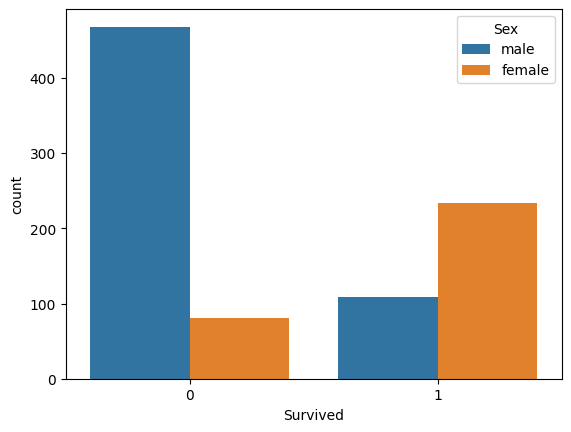

In [49]:
sns.countplot(data = train, x='Survived', hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

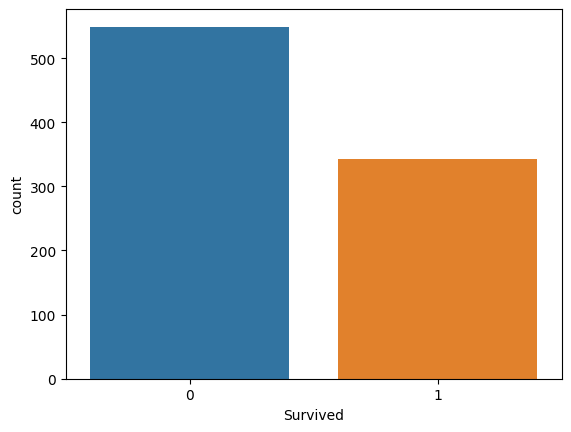

In [50]:
sns.countplot(data = train, x='Survived')

# **4. Modelling**

In [51]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex(encode)',
       'Sex(bool)'],
      dtype='object')

In [52]:
# Modeling (machine learning)
dt_clf = DecisionTreeClassifier()

In [53]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex(encode),Sex(bool)
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1.0,True


In [59]:
# (1) Set features
f_names = ['Pclass', 'Sex(encode)', 'SibSp', 'Parch', 'Fare']
x = train[f_names]

# (2) Set Label
y = train['Survived']

In [60]:
x.info()
x.head(1)
# machine learning only use NUMBER

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex(encode)  891 non-null    float64
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


,Pclass,Sex(encode),SibSp,Parch,Fare
0,3,1.0,1,0,7.25


In [63]:
test['Sex'].unique()

array(['male', 'female'], dtype=object)

In [64]:
## Changing type of object into numeric value for analysis ##

test["Sex"] == 'male' # true
test[test["Sex"] == 'male'] # true 인것만 보여줌

# creating a new column "Sex(encode)"" by assigning 1 and 2
test.loc[train["Sex"] == 'male', "Sex(encode)"] = 1
test.loc[train["Sex"] == 'female', "Sex(encode)"] = 2

test["Sex(bool)"] = test["Sex"] == 'male' # the value is either true or false

In [65]:
# For test dataset
x_test = test[f_names]

In [73]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex(encode)  418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         417 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [74]:
dt_clf.fit(x,y)

DecisionTreeClassifier()

In [75]:
x.columns

Index(['Pclass', 'Sex(encode)', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [76]:
dt_clf.feature_importances_

pd.DataFrame(dt_clf.feature_importances_ , index=  x.columns).sort_values(by = 0)

,0
Parch,0.063527
SibSp,0.070288
Pclass,0.113370
Fare,0.369112
Sex(encode),0.383705


In [77]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex(encode)  418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         417 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [78]:
x_test.isnull().sum()

Pclass         0
Sex(encode)    0
SibSp          0
Parch          0
Fare           1
dtype: int64

In [79]:
x_test["Fare"].fillna(1, inplace = True)

<ipython-input-79-35f4886736bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Fare"].fillna(1, inplace = True)


# **5. Prediction**

In [80]:
# predict
pred = dt_clf.predict(x_test)

# **6. Reporting / Submit**

In [85]:
submission['Survived'] = pred
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,1
416,1308,0


In [86]:
submission.to_csv('titanic_submission22.csv',index = False)